Introduction:
This dataset contains information about 30 features (columns) of near 1 million loan applicants of a bank, which is a peer to peer lending bank based in the Ireland. The complete dataset is from Lending Club, and it has been changed from Kaggle.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use('classic')
%matplotlib inline
sns.set()

In [2]:
# Import dataset
data = pd.read_csv("loan_final313.csv")
display(data.head())
print(type(data))

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,01/12/2011,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,01/12/2011,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,01/12/2011,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,01/12/2011,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,01/12/2011,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


<class 'pandas.core.frame.DataFrame'>


# Feature 1 - Income

In [3]:
# First 5 records
income = data.iloc[:,8]
print(income.head())
income_cat = data.iloc[:,9]
print(income_cat.head())

# Unique values
print(income_cat.unique())

0    24000
1    30000
2    12252
3    49200
4    80000
Name: annual_inc, dtype: int64
0    1
1    1
2    1
3    1
4    1
Name: income_cat, dtype: int64
[1 2 3]


* It does not mention the criteria for income type 1, 2 and 3, so we have to find out.

In [4]:
print(income[income_cat == 1].describe())
print(income[income_cat == 2].describe())
print(income[income_cat == 3].describe())

count    729616.000000
mean      58581.971748
std       20753.331500
min           0.000000
25%       42000.000000
50%       57000.000000
75%       75000.000000
max      100000.000000
Name: annual_inc, dtype: float64
count    140977.000000
mean     131578.972910
std       25188.435369
min      100000.000000
25%      110000.000000
50%      125000.000000
75%      148000.000000
max      200000.000000
Name: annual_inc, dtype: float64
count    1.678600e+04
mean     3.149025e+05
std      3.179370e+05
min      2.000010e+05
25%      2.250000e+05
50%      2.500000e+05
75%      3.150000e+05
max      9.500000e+06
Name: annual_inc, dtype: float64


 * type 1 - （0, 100,000], type 2 - （100,000, 200,000], type 3 - (200,000, 9,500,000]

In [5]:
# Basic statistics
print(income.describe())

count    8.873790e+05
mean     7.502759e+04
std      6.469815e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64


* It is noticeable that min and 75% percentile are less than 100,000 euro, which means that more than 75% of the clients belong to low income category. It is consistent to the common sense.

# Feature 2 - Employment length

In [6]:
# First 5 records
emp_len = data.iloc[:,4]
print(emp_len.head())

# Unique values
print(emp_len.unique())

0    10.0
1     0.5
2    10.0
3    10.0
4     1.0
Name: emp_length_int, dtype: float64
[10.    0.5   1.    3.    8.    9.    4.    5.    6.    2.    7.    6.05]


In [7]:
# Basic statistics
print(emp_len.describe())

count    887379.000000
mean          6.050564
std           3.507405
min           0.500000
25%           3.000000
50%           6.050000
75%          10.000000
max          10.000000
Name: emp_length_int, dtype: float64


* Notice that 75% percentile and max are both 10, which implies at least 1/4 of the clients have a employment length of 10 years.

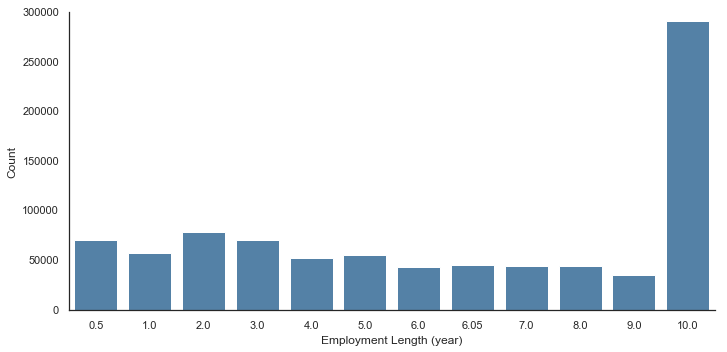

In [8]:
# Histogram
with sns.axes_style('white'):
    g1 = sns.catplot("emp_length_int", data=data, aspect=2, kind="count", color='steelblue')
    g1.set(xlabel='Employment Length (year)', ylabel='Count')
g1.savefig('emp_len_his.png')


* It is obvious that the last category takes up a high percentage.

In [9]:
(emp_len == 10).sum() / len(emp_len)

0.32857324773293034

* To be specific, 32.8% of the clients have a long term of employment (10 years).

# Feature 3 - Interest rate

In [10]:
# First 5 records
int_rate = data.iloc[:,21]
print(int_rate.head())

# Unique values
print(int_rate.unique())

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: interest_rate, dtype: float64
[10.65 15.27 15.96 13.49 12.69  7.9  18.64 21.28 14.65  9.91 16.29  6.03
 11.71 12.42 14.27 16.77  7.51  8.9  18.25  6.62 19.91 17.27 17.58 21.67
 19.42 22.06 20.89 20.3  23.91 19.03 23.52 23.13 22.74 22.35 24.11  6.
 22.11  7.49 11.99  5.99 10.99  9.99 18.79 11.49  8.49 15.99 16.49  6.99
 12.99 15.23 14.79  5.42 10.59 17.49 15.62 21.36 19.29 13.99 18.39 16.89
 17.99 20.62 20.99 22.85 19.69 20.25 23.22 21.74 22.48 23.59 12.62 18.07
 11.63  7.91  7.42 11.14 20.2  12.12 19.39 16.11 17.54 22.64 13.84 16.59
 17.19 12.87 20.69  9.67 21.82 19.79 18.49 22.94 24.59 24.4  21.48 14.82
 14.17  7.29 17.88 20.11 16.02 17.51 13.43 14.91 13.06 15.28 15.65 17.14
 11.11 10.37 16.4   7.66 10.   18.62 10.74  5.79  6.92  9.63 14.54 12.68
 19.36 13.8  18.99 21.59 20.85 21.22 19.74 20.48  6.91 12.23 12.61 10.36
  6.17  6.54  9.25 16.69 15.95  8.88 13.35  9.62 16.32 12.98 14.83 13.72
 14.09 14.46 20.03 17.8  15.2  15.5

In [11]:
# Basic statistics
print(int_rate.describe())

count    887379.000000
mean         13.246740
std           4.381867
min           5.320000
25%           9.990000
50%          12.990000
75%          16.200000
max          28.990000
Name: interest_rate, dtype: float64


In [12]:
# Test if "interest rate" is from a normal distribution
k2,p2 = stats.normaltest(int_rate)
alpha = 5e-2

if p2 < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis can be rejected


* Feature interst rate is not from a normal distribution.

# Feature 4 - Loan amount

In [13]:
# First 5 records
loan_amount = data.iloc[:,10]
print(loan_amount.head())

# Unique values
print(loan_amount.unique())

0     5000
1     2500
2     2400
3    10000
4     3000
Name: loan_amount, dtype: int64
[ 5000  2500  2400 ... 32925 32825 32575]


In [14]:
# Basic statistics
print(loan_amount.describe())

count    887379.000000
mean      14755.264605
std        8435.455601
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amount, dtype: float64


In [15]:
# Test if "Loan amount" is from a normal distribution
k1,p1 = stats.normaltest(loan_amount)
alpha = 5e-2

if p1 < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis can be rejected


* According to the test, "loan amount" is not from a normal distribution.

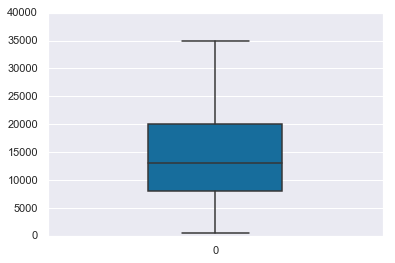

In [16]:
# Boxplot
bplot = sns.boxplot(data=loan_amount, width=0.4, palette="colorblind")
bplot.set(ylim=(10, 40000))
plt.savefig('loa_amo_box.png')

# Feature 5 - Loan term

In [17]:
# First 5 records
loan_term = data.iloc[:,11]
print(loan_term.head())

# Unique values
print(loan_term.unique())

0     36 months
1     60 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object
[' 36 months' ' 60 months']


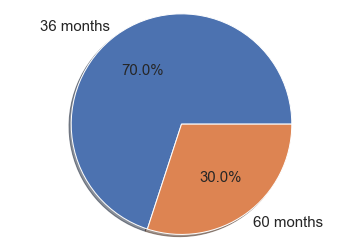

In [18]:
# Pie chart
labels =['36 months', '60 months']
s1 = loan_term.str.contains('36 months').sum()/len(loan_term)
s2 = loan_term.str.contains('60 months').sum()/len(loan_term)
sizes = [s1, s2]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True,  textprops={'fontsize': 15})
ax1.axis('equal')
plt.savefig('loa_ter_pie.png')

# Feature 6 - Grade

In [19]:
# First 5 records
grade = data.iloc[:,22]
print(grade.head())

# Unique values
print(grade.unique())

0    B
1    C
2    C
3    C
4    B
Name: grade, dtype: object
['B' 'C' 'A' 'E' 'F' 'D' 'G']


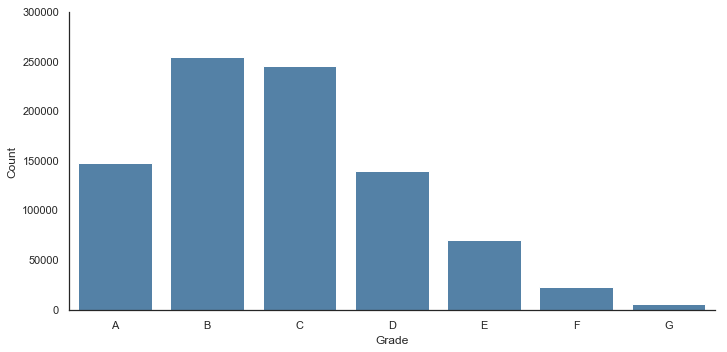

In [20]:
# Bar plot
with sns.axes_style('white'):
    g11 = sns.catplot("grade", data=data, aspect=2,
                       kind="count", color='steelblue', order=["A", "B", "C", "D", "E", "F","G"])
    g11.set(xlabel='Grade', ylabel='Count')
    g11.savefig('grade_his.png')

In [21]:
(grade.str.contains('B').sum()+grade.str.contains('C').sum()) / len(grade)

0.5639022334312622

* Grade B and C take up 56.4% of the feature "grade".

# Feature 7 - Loan condition

In [22]:
# First 5 records
loan_con = data.iloc[:,19]
print(loan_con.head())

# Unique values
print(loan_con.unique())

0    Good Loan
1     Bad Loan
2    Good Loan
3    Good Loan
4    Good Loan
Name: loan_condition, dtype: object
['Good Loan' 'Bad Loan']


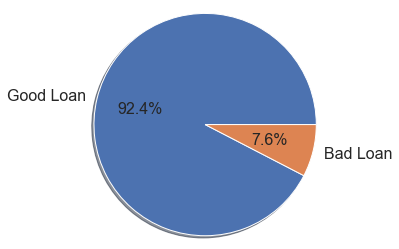

In [23]:
# Pie chart
labels3 =['Good Loan', 'Bad Loan']
s5 = loan_con.str.contains('Good Loan').sum()/len(loan_con)
s6 = loan_con.str.contains('Bad Loan').sum()/len(loan_con)
sizes = [s5, s6]

fig3, ax3 = plt.subplots()
ax3.pie(sizes, labels=labels3, autopct='%1.1f%%', shadow=True,  textprops={'fontsize': 16})
ax3.axis('equal')
plt.savefig('loa_con_pie.png')

# Feature 8 - Home ownership

In [24]:
# First 5 records
home_own = data.iloc[:,5]
print(home_own.head())

# Unique values
print(home_own.unique())

0    RENT
1    RENT
2    RENT
3    RENT
4    RENT
Name: home_ownership, dtype: object
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']


* type 1 - Rent, type 2 - Own, type 3 - Mortgage, type 4 - Other, type 5 - None, type 6 - Any.

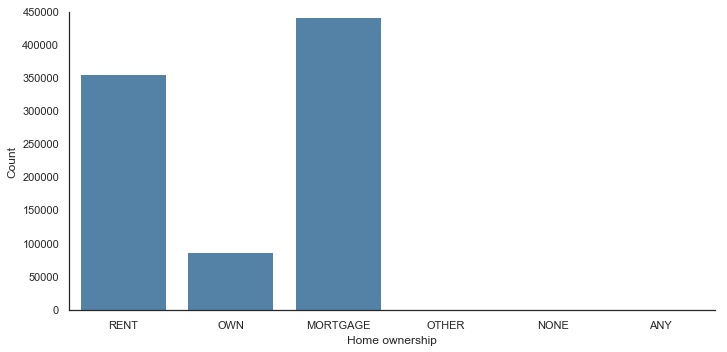

In [25]:
# Bar plot 
with sns.axes_style('white'):
    g2 = sns.catplot("home_ownership", data=data, aspect=2, kind="count", color='steelblue')
    g2.set(xlabel='Home ownership', ylabel='Count')
g2.savefig('hom_own_his.png')

In [26]:
((home_own=="OTHER")|(home_own=="NONE")|(home_own=="ANY")).sum()/len(home_own)

0.0002648248380906016

* To be specific, the last 3 types take up only 0.03%, which can be ignored in the next step of analysis.

# Feature 9 - Purpose

In [27]:
# First 5 records
purpose = data.iloc[:,15]
print(purpose.head())

# Unique values
print(purpose.unique())

0       credit_card
1               car
2    small_business
3             other
4             other
Name: purpose, dtype: object
['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']


* type 1 - credit_card, type 2 - car, type 3 - small_business, type 4 - other, type 5 - wedding, type 6 - debt_consolidation, type 7 - home_improvement, type 8 - major_purchase, type 9 - medical, type 10 - moving, type 11 - vacation, type 12 - house, type 13 - renewable_energy, type 14 - educational.

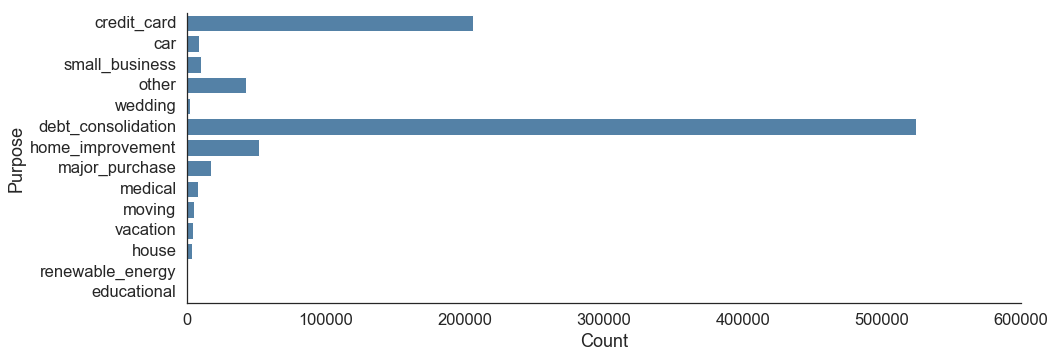

In [28]:
# Bar plot
sns.set( font_scale=1.5)
with sns.axes_style('white'):
    g7 = sns.catplot(y="purpose", data=data, aspect=3, kind="count", color='steelblue')
    g7.set(ylabel='Purpose', xlabel='Count')
    g7.savefig('pur_his.png')

In [29]:
print(purpose.str.contains('debt_consolidation').sum() / len(purpose))
print(purpose.str.contains('credit_card').sum() / len(purpose))

0.5907453297858074
0.2323494245412614


* According to the above plot, debt consolidation and credit card are 2 major purposes, taking up 59.1% and 23.2% respectively.

# Feature 10 - Interest payment

In [30]:
# First 5 records
interest_pay = data.iloc[:,17]
print(interest_pay.head())

# Unique values
print(interest_pay.unique())

0     Low
1    High
2    High
3    High
4     Low
Name: interest_payments, dtype: object
['Low' 'High']


* type 1 - Low, type 2 - High.

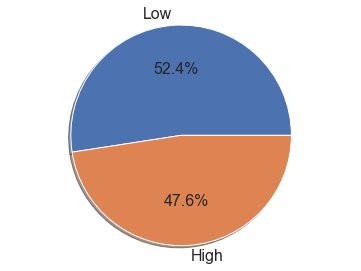

In [31]:
# Pie chart
labels2 =['Low', 'High']
s3 = interest_pay.str.contains('Low').sum()/len(interest_pay)
s4 = interest_pay.str.contains('High').sum()/len(interest_pay)
sizes = [s3, s4]

fig2, ax2 = plt.subplots()
ax2.pie(sizes, labels=labels2, autopct='%1.1f%%', shadow=True,  textprops={'fontsize': 16})
ax2.axis('equal')
plt.savefig('int_pay_pie.png')